<a href="https://colab.research.google.com/github/Svetorus/Course-project-Data-Science-2/blob/master/save_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import json
pd.set_option('max_colwidth', 800)
#import warnings
#warnings.filterwarnings('ignore')

In [0]:
data = open("./P45.json",encoding="utf8")

In [0]:
data = json.loads(data.read())

In [0]:
#data = json.load("./P45.json")
#data = pd.read_json("./P45.json")

In [0]:
#data # result below

{'data': [{'input': {'image': 'https://dbrain-public.s3.amazonaws.com/project/P45/77a55f65-ee92-4070-851c-bf37ed9f0af2/a50bbc8f-9cb8-49bc-89d7-462258898a0b/161.jpg'},
   'payload': {'aabb': {'license_plate': [[[0.18602540834845735,
        0.6778846153846154],
       [0.26406533575317603, 0.6778846153846154],
       [0.26406533575317603, 0.7548076923076923],
       [0.18602540834845735, 0.7548076923076923],
       [0.18602540834845735, 0.6778846153846154]]]}}},
  {'input': {'image': 'https://dbrain-public.s3.amazonaws.com/project/P45/b6b222b5-d2d2-49c8-98ba-15521502f8b6/c7b1fe48-9e72-4150-90e7-38031fae4d62/163.jpg'},
   'payload': {'aabb': {'license_plate': [[[0.34411384217335056,
        0.592132568359375],
       [0.6222509702457956, 0.592132568359375],
       [0.6222509702457956, 0.683929443359375],
       [0.34411384217335056, 0.683929443359375],
       [0.34411384217335056, 0.592132568359375]]]}}},

In [0]:
pictures = []
license_plates = []

def get_picture(data):
    if data is not None:
        if "input" in data:
            if data["input"] is not None:
                if "image" in data["input"]:
                    if "/" in data["input"]["image"]:
                        return data["input"]["image"].split("/")[-1]


def get_license(data):
    if data is not None:
        if "payload" in data:
            if data["payload"] is not None:
                if "aabb" in data["payload"]:
                    return data["payload"]["aabb"]["license_plate"][0]


for i in data["data"]:
    pictures.append(get_picture(i))
    license_plates.append(get_license(i))

#print(pictures)
#a = [print(pictures[i], license_plates[i]) for i in range(len(pictures))]
    
base = (dict(zip(pictures, license_plates)))

In [0]:
# base # result below

{'161.jpg': [[0.18602540834845735, 0.6778846153846154],
  [0.26406533575317603, 0.6778846153846154],
  [0.26406533575317603, 0.7548076923076923],
  [0.18602540834845735, 0.7548076923076923],
  [0.18602540834845735, 0.6778846153846154]],
 '163.jpg': [[0.34411384217335056, 0.592132568359375],
  [0.6222509702457956, 0.592132568359375],
  [0.6222509702457956, 0.683929443359375],
  [0.34411384217335056, 0.683929443359375],
  [0.34411384217335056, 0.592132568359375]],

In [0]:
base = pd.DataFrame(base)

In [0]:
base.head()

,161.jpg,163.jpg,195.jpg,116.jpg,213.jpg,206.jpg,55.jpg,87.jpg,141.jpg,34.jpg,...,75.jpg,208.jpg,10.jpg,64.jpg,199.jpg,158.jpg,219.jpg,193.jpg,95.jpg,157.jpg
0,"[0.18602540834845735, 0.6778846153846154]","[0.34411384217335056, 0.592132568359375]","[0.5860419451871658, 0.687374749498998]","[0.3751488095238095, 0.4420289855072464]",None,"[0.22897800776196636, 0.7534520348837209]","[0.6869340232858991, 0.6221771628498728]","[0.2569496619083396, 0.5847797062750334]",None,None,...,None,None,"[0.20223958333333333, 0.87]",None,None,None,None,None,None,None
1,"[0.26406533575317603, 0.6778846153846154]","[0.6222509702457956, 0.592132568359375]","[0.7518173462566845, 0.687374749498998]","[0.5132440476190476, 0.4420289855072464]",None,"[0.33376455368693403, 0.7534520348837209]","[0.8266494178525227, 0.6221771628498728]","[0.3561232156273479, 0.5847797062750334]",None,None,...,None,None,"[0.27557291666666667, 0.87]",None,None,None,None,None,None,None
2,"[0.26406533575317603, 0.7548076923076923]","[0.6222509702457956, 0.683929443359375]","[0.7518173462566845, 0.7615230460921844]","[0.5132440476190476, 0.5115942028985507]",None,"[0.33376455368693403, 0.8038396317829457]","[0.8266494178525227, 0.6832458651399491]","[0.3561232156273479, 0.643524699599466]",None,None,...,None,None,"[0.27557291666666667, 0.9366666666666666]",None,None,None,None,None,None,None
3,"[0.18602540834845735, 0.7548076923076923]","[0.34411384217335056, 0.683929443359375]","[0.5860419451871658, 0.7615230460921844]","[0.3751488095238095, 0.5115942028985507]",None,"[0.22897800776196636, 0.8038396317829457]","[0.6869340232858991, 0.6832458651399491]","[0.2569496619083396, 0.643524699599466]",None,None,...,None,None,"[0.20223958333333333, 0.9366666666666666]",None,None,None,None,None,None,None
4,"[0.18602540834845735, 0.6778846153846154]","[0.34411384217335056, 0.592132568359375]","[0.5860419451871658, 0.687374749498998]","[0.3751488095238095, 0.4420289855072464]",None,"[0.22897800776196636, 0.7534520348837209]","[0.6869340232858991, 0.6221771628498728]","[0.2569496619083396, 0.5847797062750334]",None,None,...,None,None,"[0.20223958333333333, 0.87]",None,None,None,None,None,None,None


In [0]:
base['153.jpg']

0     [0.6196636481241915, 0.418127417794971]
1     [0.7800776196636482, 0.418127417794971]
2    [0.7800776196636482, 0.4896941489361702]
3    [0.6196636481241915, 0.4896941489361702]
4     [0.6196636481241915, 0.418127417794971]
Name: 153.jpg, dtype: object

In [0]:
image_name = '153.jpg'

In [0]:
base[image_name][1][0]

0.7800776196636482

In [0]:
base[image_name][0][0]

0.6196636481241915

In [0]:
base[image_name][3][1]

0.4896941489361702

In [0]:
base[image_name][0][1]

0.418127417794971

In [0]:
x_right = base[image_name][2][0]

In [0]:
y_right =  base[image_name][2][1]

In [0]:
y = base[image_name][0][1]

In [0]:
x = base[image_name][0][0]

In [0]:
w = base[image_name][1][0]-base[image_name][0][0]

In [0]:
img = Image.open("./to_label/153.jpg")

In [0]:
img.size

(1000, 669)

In [0]:
crope = img.crop((x*img.size[0],y*img.size[1],x_right*img.size[0], y_right*img.size[1]))

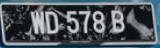

In [0]:
crope

In [0]:
#def crope_img(image_name, base):
    img = Image.open("./to_label/"+image_name)
    x = base[image_name][0][0]
    y = base[image_name][0][1]
    x_right = base[image_name][2][0]
    y_right =  base[image_name][2][1]
    crope = img.crop((x*img.size[0],y*img.size[1],x_right*img.size[0], y_right*img.size[1]))
    crope.save('./Photo_of_numbers/'+image_name)

IndentationError: unexpected indent (<ipython-input-24-617242a606fb>, line 2)

In [0]:
#for i in base.columns:
    try: 
        crope_img(i,base)
    except Exception as e:
        print(e)

In [0]:
#img = Image.open("./to_label/114.jpg